In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("./parameters")
sys.path.append("./thalamocortical_model_study")

# External libraries
import matplotlib.pyplot as plt
import numpy as np

# Own libraries
import mt_utils

# Neurolib
from neurolib.models.thalamocortical import ThalamocorticalModel
from neurolib.models.aln import ALNModel
from neurolib.models.thalamus import ThalamicMassModel
from neurolib.models.multimodel import MultiModel
from aln_thalamus import ALNThalamusMiniNetwork

# parameters
from thalamocortical_params import params_multimodel, params_connected_imported
from neurolib.models.thalamocortical.loadDefaultParams import loadDefaultParams

# Set plot size
width = 40
height = 16
plt.rcParams['figure.figsize'] = [width, height]

# Comparing thalamocortical implementation
Comparing the thalamocortical implementation to Neurolib ALN and Thalamus as well as the thalamocortical multimodel.

# Comparing thalamocortical with ALN and thalamus

In [2]:
duration = 40000

# CREATE AND RUN MODELS

# Create unconnected model
model_unconnected = ThalamocorticalModel(seed=42)
model_unconnected.params["dt"] = 0.01
model_unconnected.params["duration"] = duration
model_unconnected.run()

# Create ALN model
model_aln = ALNModel(seed=42)
model_aln.params["dt"] = 0.01
model_aln.params["duration"] = duration
model_aln.run()

# Create thalamus model
model_thal = ThalamicMassModel(seed=42)
model_thal.params["dt"] = 0.01
model_thal.params["duration"] = duration
model_thal.run()

## Plotting ALN <--> thalamocortical

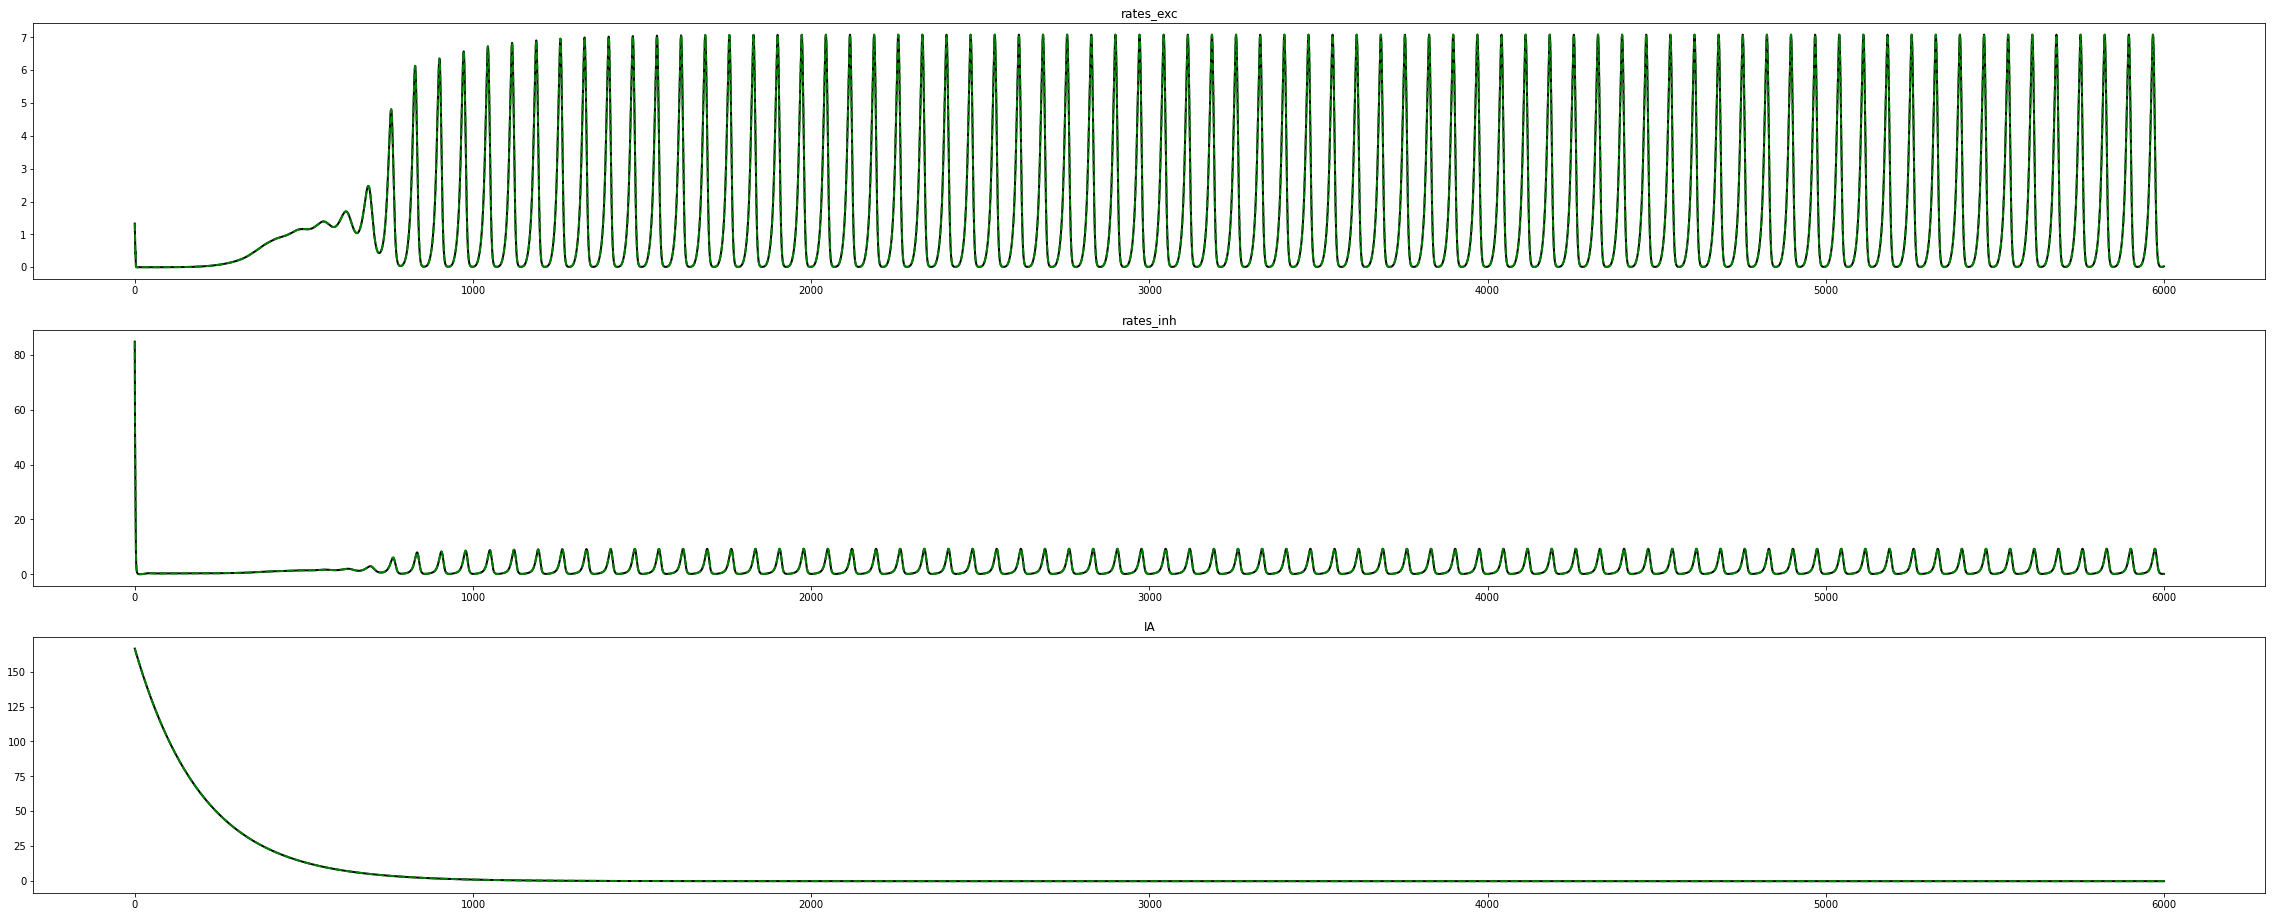

In [3]:
aln_outputs = ["rates_exc", "rates_inh", "IA"]
t_start = 0 
t_end = 600000

fig, axs = plt.subplots(3,1)

for idx, aln_output in enumerate(aln_outputs):
    ax = axs[idx]
    
    ax.set_title(aln_output)
    ax.plot(model_unconnected['t'][t_start:t_end], model_unconnected[aln_output].T[t_start:t_end], lw=2, c='k')
    ax.plot(model_aln['t'][t_start:t_end], model_aln[aln_output].T[t_start:t_end], lw=2, c='g', linestyle='--')

## Plotting thalamus<--> thalamocortical

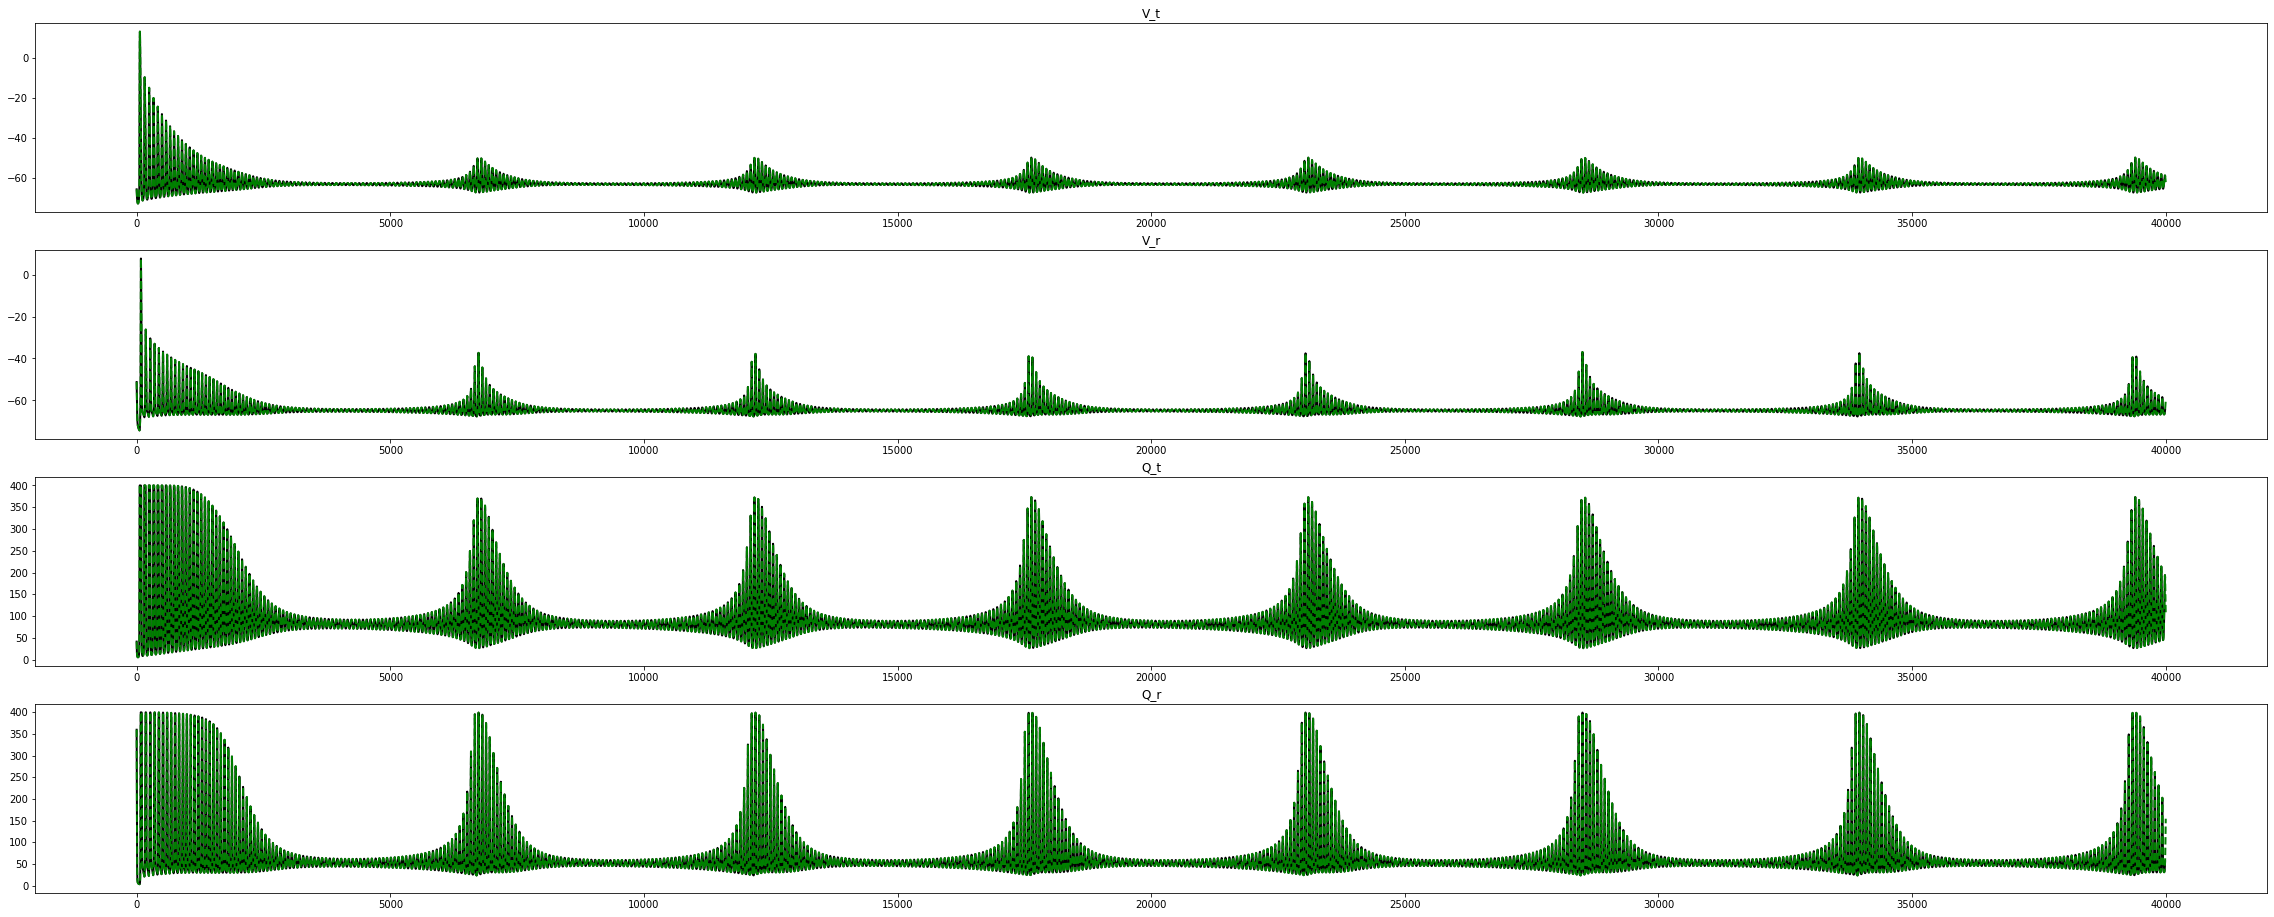

In [4]:
thal_outputs = ["V_t", "V_r", "Q_t", "Q_r"]
t_start = 0 
t_end = -1

fig, axs = plt.subplots(4,1)

for idx, thal_output in enumerate(thal_outputs):
    ax = axs[idx]
    
    ax.set_title(thal_output)
    ax.plot(model_unconnected['t'][t_start:t_end], model_unconnected[thal_output].T[t_start:t_end], lw=2, c='k')
    ax.plot(model_thal['t'][t_start:t_end], model_thal[thal_output].T[t_start:t_end], lw=2, c='g', linestyle='--')